In [1]:
import numpy as np
import networkx as nx

In [2]:
data = np.loadtxt('input.csv',delimiter='-',dtype=str)
data = (zip(data[:,0], data[:,1]))

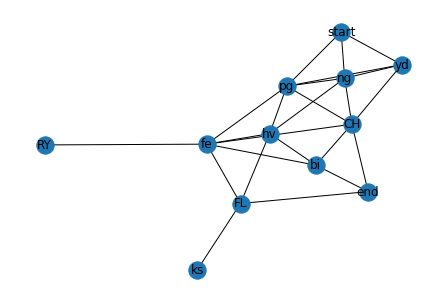

In [3]:
G = nx.Graph()
G.add_edges_from(data)
nx.draw(G,with_labels=True)

In [4]:
# Part One

path_set = set()

def find_path(node,path_so_far):
    global path_set
    if node == 'end':
        path_set.add(tuple(path_so_far))
    else:
        neighbors = G.neighbors(node)
        for neighbor in neighbors:
            if neighbor.isupper() or (neighbor not in path_so_far):
                new_path = path_so_far.copy()
                new_path.append(neighbor)
                find_path(neighbor,new_path)

find_path('start',['start'])

len(path_set)

5958

In [6]:
# Part Two

path_set = set()

def find_path(node,path_so_far,visited_twice = False):
    global path_set
    if node == 'end':
        #print(path_so_far)
        path_set.add(tuple(path_so_far))
    else:
        neighbors = G.neighbors(node)
        for neighbor in neighbors:
            if neighbor.isupper() or (neighbor not in path_so_far):
                if neighbor != 'start':
                    new_path = path_so_far.copy()
                    new_path.append(neighbor)
                    find_path(neighbor,new_path,visited_twice)
            elif (not neighbor.isupper()) and (visited_twice == False):
                if neighbor != 'start':
                    new_path = path_so_far.copy()
                    new_path.append(neighbor)
                    find_path(neighbor,new_path,True)

find_path('start',['start'],False)

len(path_set)

150426